# **For Use 3DRESNET**

In [1]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.python.solutions.pose import PoseLandmark
pic_shape = (176, 100)

# ==== Cấu hình Mediapipe ====
mp_holistic = mp.solutions.holistic

included_landmarks = [
    PoseLandmark.RIGHT_SHOULDER, 
    PoseLandmark.RIGHT_ELBOW, 
    PoseLandmark.RIGHT_WRIST, 
    PoseLandmark.LEFT_SHOULDER, 
    PoseLandmark.LEFT_ELBOW, 
    PoseLandmark.LEFT_WRIST,
]

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def extract_keypoint(res):
    arr = []
    if res.pose_landmarks:
        for landmark_id in included_landmarks:
            point = res.pose_landmarks.landmark[landmark_id]
            arr.extend([point.x, point.y, point.z])
    else:
        arr.extend([0, 0, 0] * len(included_landmarks))

    if res.left_hand_landmarks:
        for point in res.left_hand_landmarks.landmark:
            arr.extend([point.x, point.y, point.z])
    else:
        arr.extend([0, 0, 0] * 21)

    if res.right_hand_landmarks:
        for point in res.right_hand_landmarks.landmark:
            arr.extend([point.x, point.y, point.z])
    else:
        arr.extend([0, 0, 0] * 21)

    return np.array(arr).reshape(48, 3)


In [2]:
# ==== Webcam xử lý real-time ====
def record():
    cap = cv2.VideoCapture(0)
    recording = False
    sequence = []  # chứa dãy keypoints
    frame_sequence = []  # chứa ảnh
    sequence_length = 32

    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            frame = cv2.resize(frame, (176, 100))
            key = cv2.waitKey(10) & 0xFF

            # ⏺️ Nhấn 's' để bắt đầu ghi
            if key == ord('s'):
                print("✅ Bắt đầu ghi hình...")
                recording = True
                sequence = []
                frame_sequence = []

            # ⏹️ Nhấn 'e' để dừng ghi
            if key == ord('e'):
                print("🛑 Dừng ghi hình.")
                recording = False

            if recording:
                image, results = mediapipe_detection(frame, holistic)
                keypoints = extract_keypoint(results)
                sequence.append(keypoints)
                frame_sequence.append(frame.copy())

                if len(sequence) > sequence_length:
                    sequence.pop(0)
                    frame_sequence.pop(0)

                if len(sequence) == sequence_length:
                    input_data = np.array(sequence).flatten().reshape(1, -1)
                    print("📦 Feature ready! Shape:", input_data.shape)

                cv2.imshow('Webcam Feed', image)
            else:
                cv2.imshow('Webcam Feed', frame)  # chỉ hiện frame, không xử lý gì

            if key == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

    return sequence, frame_sequence

In [3]:
sequence, frame_sequence = record()

✅ Bắt đầu ghi hình...
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1

In [4]:
keypoint_array_one_pic = sequence[0]
pic = frame_sequence[0]
pose = keypoint_array_one_pic[:6]
rh = keypoint_array_one_pic[6: 28]
lh = keypoint_array_one_pic[28:]

In [5]:
pic_shape = (176, 100)

pose_scale = set()
rh_scale = set()
lh_scale = set()
for point in pose:
    x = int((pic_shape[0] - 1) * min(point[0], 1))
    y = int((pic_shape[1] - 1) * min(point[1], 1))
    if x != 0 or y != 0:
        pose_scale.add((x, y))
for point in rh:
    x = int((pic_shape[0] - 1) * min(point[0], 1))
    y = int((pic_shape[1] - 1) * min(point[1], 1))
    if x != 0 or y != 0:
        rh_scale.add((x, y))
for point in lh:
    x = int((pic_shape[0] - 1) * min(point[0], 1))
    y = int((pic_shape[1] - 1) * min(point[1], 1))
    if x != 0 or y != 0:
        lh_scale.add((x, y))

print(pose_scale)
print(rh_scale)
print(lh_scale)

{(80, 94), (135, 94), (54, 93), (44, 99), (159, 99), (124, 95)}
{(113, 99), (115, 41), (125, 82), (115, 50), (100, 67), (84, 80), (101, 99), (92, 75), (110, 86), (124, 91), (104, 55), (107, 78), (114, 59), (99, 83), (107, 44), (102, 72), (92, 74), (109, 35), (89, 99), (102, 90), (118, 80), (112, 73)}
{(103, 85), (102, 77), (105, 70), (100, 83), (99, 66), (88, 72), (107, 79), (96, 82), (94, 72), (80, 79), (100, 88), (90, 77), (104, 73), (103, 71), (97, 67), (109, 75), (92, 71), (100, 78), (83, 74), (96, 92)}


In [6]:
key_point_set = pose_scale.union(rh_scale, lh_scale)
X_Point = [point[1] for point in key_point_set ]
Y_Point = [point[0] for point in key_point_set ]

print(min(X_Point))
print(max(X_Point))
print(max(Y_Point))
print(min(Y_Point))

35
99
159
44


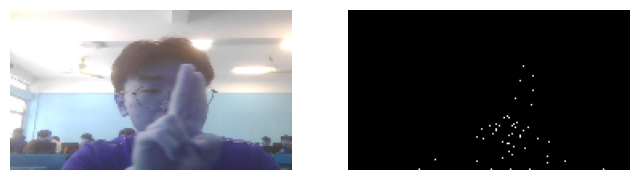

In [7]:
import matplotlib.pyplot as plt

arr = np.zeros((100, 176))
for point in key_point_set:
    x, y = point[1], point[0]
    arr[x, y] = 1

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(pic)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(arr, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
def crop_one_pic(keypoint_array_one_pic): # input: an array with 48 array inside
    pic_shape = (176, 100, 3)
    
    pose = keypoint_array_one_pic[:6]
    rh = keypoint_array_one_pic[6: 28]
    lh = keypoint_array_one_pic[28:]
    
    pose_scale = set()
    rh_scale = set()
    lh_scale = set()
    for point in pose:
        x = int((pic_shape[0] - 1) * min(point[0], 1))
        y = int((pic_shape[1] - 1) * min(point[1], 1))
        if x != 0 or y != 0:
            pose_scale.add((x, y))
    for point in rh:
        x = int((pic_shape[0] - 1) * min(point[0], 1))
        y = int((pic_shape[1] - 1) * min(point[1], 1))
        if x != 0 or y != 0:
            rh_scale.add((x, y))
    for point in lh:
        x = int((pic_shape[0] - 1) * min(point[0], 1))
        y = int((pic_shape[1] - 1) * min(point[1], 1))
        if x != 0 or y != 0:
            lh_scale.add((x, y))

    # SET the KEYPOINT
    key_point_set = pose_scale.union(rh_scale, lh_scale)
    
    x_set = [point[1] for point in key_point_set ]
    y_set = [point[0] for point in key_point_set ]
    # Sort the border for cropped picture
    if len(key_point_set) > 0: 
        min_x = min(x_set) - 10
        max_x = max(x_set) + 10
        min_y = min(y_set) - 10
        max_y = max(y_set) + 10
        min_x = max(0, min_x)
        max_x = min(pic_shape[1], max_x)
        min_y = max(0, min_y)
        max_y = min(pic_shape[0], max_y)
        return [min_x, max_x, min_y, max_y]
    else:
        return -1

In [9]:
def Cropped(frame_sequence, sequence):
    cropped_frame_sequence = frame_sequence.copy()
    
    crop_minX = crop_minY = 100000
    crop_maxX = crop_maxY = 0
    
    for i in range(len(sequence)):
        if type(crop_one_pic(sequence[i])) != int:
            ls = crop_one_pic(sequence[i])
            min_x, max_x, min_y, max_y = ls[0], ls[1], ls[2], ls[3]
            crop_minX = min(crop_minX, min_x)
            crop_minY = min(crop_minY, min_y)
            crop_maxX = max(crop_maxX, max_x)
            crop_maxY = max(crop_maxY, max_y)
        else:
            continue

    if crop_minX == 100000 and crop_minY == 100000 and crop_maxX == 0 and crop_maxY == 0 :
        print("RECORD AGAIN !!")
        
    for i in range(len(sequence)):
        pic = frame_sequence[i]
        cropped_frame_sequence[i] = pic[crop_minX:crop_maxX, crop_minY:crop_maxY]

    return cropped_frame_sequence


In [10]:
ls = crop_one_pic(sequence[1]) # input: an array with 48 array inside
min_x, max_x, min_y, max_y = ls[0], ls[1], ls[2], ls[3]
print(min_x, max_x, min_y, max_y)

26 100 35 169


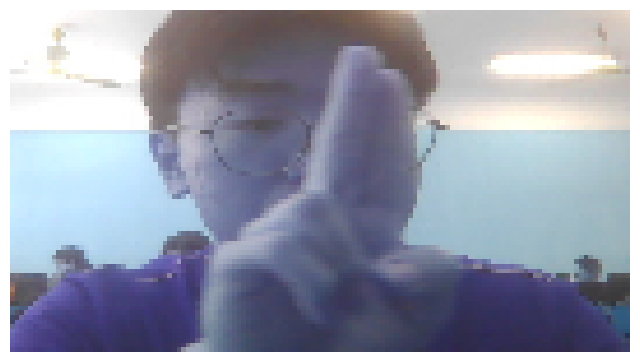

In [11]:
cropped_pic = pic[min_x:max_x, min_y:max_y]
plt.figure(figsize=(8, 8))
plt.imshow(cropped_pic)
plt.axis("off")
plt.show()

In [17]:
cropped_frame_sequence = Cropped(frame_sequence, sequence)
cropped_frame_sequence = np.array(cropped_frame_sequence)
resized_sequence = np.array([cv2.resize(frame, (128, 128)) for frame in cropped_frame_sequence])
normalize_sequence = resized_sequence.astype(np.float32) / 255.0
normalize_sequence.shape

(32, 128, 128, 3)

# IMPORT AND USE MODEL

In [18]:
from tensorflow import keras

model = keras.models.load_model("D:/University/Kì 2024.2/Computer Vision/Hand-Tracking-Computer-Control/Models/3D_RestNet50(after48epoch).keras")

In [19]:
from sklearn.preprocessing import OneHotEncoder

label_encoder = OneHotEncoder(sparse_output=False)
labels = np.array([["Doing other things"], ["No gesture"],
         ["Shaking Hand"], ["Sliding Two Fingers Down"],
         ["Sliding Two Fingers Left"], ["Sliding Two Fingers Right"],
         ["Sliding Two Fingers Up"], ["Stop Sign"],
         ["Swiping Down"], ["Swiping Left"], 
         ["Swiping Right"], ["Swiping Up"],
         ["Thumb Down"], ["Thumb Up"],
         ["Turning Hand Clockwise"], ["Turning Hand Counterclockwise"],
         ["Rolling Hand Backward"], ["Rolling Hand Forward"]])

label_encoder.fit(labels)

OneHotEncoder(sparse_output=False)

In [20]:
input_data = np.expand_dims(normalize_sequence, axis=0)
print(input_data.shape)
prediction = model.predict(input_data)

(1, 32, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step


In [21]:
label = label_encoder.inverse_transform(prediction)
print(label)

[['Thumb Up']]


# ONE HIT

In [37]:
sequence, frame_sequence = record()

#KEYPOINT
keypoint_array_one_pic = sequence[0]
pic = frame_sequence[0]
pose = keypoint_array_one_pic[:6]
rh = keypoint_array_one_pic[6: 28]
lh = keypoint_array_one_pic[28:]

pic_shape = (176, 100)

pose_scale = set()
rh_scale = set()
lh_scale = set()
for point in pose:
    x = int((pic_shape[0] - 1) * min(point[0], 1))
    y = int((pic_shape[1] - 1) * min(point[1], 1))
    if x != 0 or y != 0:
        pose_scale.add((x, y))
for point in rh:
    x = int((pic_shape[0] - 1) * min(point[0], 1))
    y = int((pic_shape[1] - 1) * min(point[1], 1))
    if x != 0 or y != 0:
        rh_scale.add((x, y))
for point in lh:
    x = int((pic_shape[0] - 1) * min(point[0], 1))
    y = int((pic_shape[1] - 1) * min(point[1], 1))
    if x != 0 or y != 0:
        lh_scale.add((x, y))


key_point_set = pose_scale.union(rh_scale, lh_scale)

cropped_frame_sequence = Cropped(frame_sequence, sequence)
cropped_frame_sequence = np.array(cropped_frame_sequence)
resized_sequence = np.array([cv2.resize(frame, (128, 128)) for frame in cropped_frame_sequence])
normalize_sequence = resized_sequence.astype(np.float32) / 255.0

input_data = np.expand_dims(normalize_sequence, axis=0)
print(input_data.shape)
prediction = model.predict(input_data)

label = label_encoder.inverse_transform(prediction)

print(label)


✅ Bắt đầu ghi hình...
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
📦 Feature ready! Shape: (1, 4608)
🛑 Dừng ghi hình.
(1, 32, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[['Turning Hand Clockwise']]
